In [1]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn import linear_model
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

Dataset downloaded from https://www.retrosheet.org/gamelogs/index.html. Data dictionary can be found at http://www.retrosheet.org/gamelogs/glfields.txt.

In [2]:
# Read games logs from the 2015 season into a dataframe
input_df = pd.read_table("GL2015.TXT", sep=",", header=None)

### Data Preprocessing

In [3]:
def rename_columns(input_df):
    """ 
    Rename columns of an input dataframe for readability.
  
    Parameters: 
    input_df (dataframe): Input dataframe.
  
    Returns: 
    dataframe: Dataframe with renamed column names.
  
    """
    
    input_df.rename(columns = {3: 'Visiting Team', 6: 'Home Team', 9: 'Runs Visitor', 10: 'Runs Home'}, inplace=True)
    return input_df

# Invoke the function to rename columns
input_df = rename_columns(input_df)

# Display first ten rows
input_df.head(10)

,0,1,2,Visiting Team,4,5,Home Team,7,8,Runs Visitor,...,151,152,153,154,155,156,157,158,159,160
0,20150405,0,Sun,SLN,NL,1,CHN,NL,1,3,...,David Ross,2,lestj001,Jon Lester,1,lastt001,Tommy La Stella,4,NaN,Y
1,20150406,0,Mon,MIN,AL,1,DET,AL,1,0,...,Nick Castellanos,5,avila001,Alex Avila,2,iglej001,Jose Iglesias,6,NaN,Y
2,20150406,0,Mon,CLE,AL,1,HOU,AL,1,0,...,Jed Lowrie,6,rasmc001,Colby Rasmus,7,marij002,Jake Marisnick,8,NaN,Y
3,20150406,0,Mon,CHA,AL,1,KCA,AL,1,1,...,Alex Rios,9,peres002,Salvador Perez,2,infao001,Omar Infante,4,NaN,Y
4,20150406,0,Mon,TOR,AL,1,NYA,AL,1,6,...,Alex Rodriguez,10,drews001,Stephen Drew,4,gregd001,Didi Gregorius,6,NaN,Y
5,20150406,0,Mon,TEX,AL,1,OAK,AL,1,0,...,Stephen Vogt,2,semim001,Marcus Semien,6,sogae001,Eric Sogard,4,NaN,Y
6,20150406,0,Mon,ANA,AL,1,SEA,AL,1,1,...,Mike Zunino,2,ackld001,Dustin Ackley,7,millb002,Brad Miller,6,NaN,Y
7,20150406,0,Mon,BAL,AL,1,TBA,AL,1,6,...,Rene Rivera,2,forsl001,Logan Forsythe,4,kierk001,Kevin Kiermaier,8,NaN,Y
8,20150406,0,Mon,SFN,NL,1,ARI,NL,1,5,...,Tuffy Gosewisch,2,ahmen001,Nick Ahmed,6,collj001,Josh Collmenter,1,NaN,Y
9,20150406,0,Mon,PIT,NL,1,CIN,NL,1,2,...,Brandon Phillips,4,cozaz001,Zack Cozart,6,cuetj001,Johnny Cueto,1,NaN,Y


In [4]:
def add_new_columns(input_df):
    """ 
    Add new columns to indicate which team won the game. 
  
    Parameters: 
    input_df (dataframe): Input dataframe.
  
    Returns: 
    dataframe: Dataframe with newly-added column.
  
    """
    
    input_df['Home Win'] = (input_df['Runs Home'] > input_df['Runs Visitor'])
    input_df['Visitor Win'] = (input_df['Runs Visitor'] > input_df['Runs Home'])
    return input_df

# Invoke method to add new columns
input_df = add_new_columns(input_df)

# Display
input_df.head()

,0,1,2,Visiting Team,4,5,Home Team,7,8,Runs Visitor,...,153,154,155,156,157,158,159,160,Home Win,Visitor Win
0,20150405,0,Sun,SLN,NL,1,CHN,NL,1,3,...,lestj001,Jon Lester,1,lastt001,Tommy La Stella,4,NaN,Y,False,True
1,20150406,0,Mon,MIN,AL,1,DET,AL,1,0,...,avila001,Alex Avila,2,iglej001,Jose Iglesias,6,NaN,Y,True,False
2,20150406,0,Mon,CLE,AL,1,HOU,AL,1,0,...,rasmc001,Colby Rasmus,7,marij002,Jake Marisnick,8,NaN,Y,True,False
3,20150406,0,Mon,CHA,AL,1,KCA,AL,1,1,...,peres002,Salvador Perez,2,infao001,Omar Infante,4,NaN,Y,True,False
4,20150406,0,Mon,TOR,AL,1,NYA,AL,1,6,...,drews001,Stephen Drew,4,gregd001,Didi Gregorius,6,NaN,Y,False,True


In [5]:
def proc_home_team_data(input_df):
    """ 
    Group the data by home team and compute relevant statistics.
  
    Parameters: 
    input_df (dataframe): Input dataframe.
  
    Returns: 
    dataframe: Dataframe with stats grouped by home team. 
  
    """
    
    # Group by home team
    home_group = input_df.groupby(input_df['Home Team'])

    # Compute stats: Number of games, runs scored, runs conceded, wins, run differential
    home_df = home_group[['Runs Visitor', 'Runs Home', 'Home Win']].apply(sum)
    home_df['Home Games'] = home_group['Home Win'].count()
    home_df.rename(columns = {'Runs Visitor': 'Runs by Visitor', 'Runs Home': 'Runs at Home', 'Home Win': 'Wins at Home'}, inplace=True)
    home_df['RD at Home'] = home_df['Runs at Home'] - home_df['Runs by Visitor']
    home_df.index.rename('Team', inplace=True)
    home_df.reset_index(inplace=True)

    return home_df

# Invoke method to group data by home team and compute statistics
home_df = proc_home_team_data(input_df)

# Display first ten rows
home_df.head(10)

,Team,Runs by Visitor,Runs at Home,Wins at Home,Home Games,RD at Home
0,ANA,298.0,320.0,49.0,81,22.0
1,ARI,372.0,366.0,39.0,81,-6.0
2,ATL,359.0,286.0,42.0,81,-73.0
3,BAL,353.0,408.0,49.0,81,55.0
4,BOS,383.0,433.0,43.0,81,50.0
5,CHA,338.0,290.0,40.0,81,-48.0
6,CHN,306.0,326.0,49.0,81,20.0
7,CIN,391.0,344.0,34.0,81,-47.0
8,CLE,359.0,367.0,39.0,80,8.0
9,COL,483.0,449.0,36.0,81,-34.0


In [6]:
def proc_visiting_team_data(input_df):
    """ 
    Method to group data by visiting team and compute relevant statistics.
  
    Parameters: 
    input_df (dataframe): Input dataframe.
  
    Returns: 
    dataframe: Dataframe with stats grouped by visiting team. 
  
    """
    
    # Group by visiting team
    visit_group = input_df.groupby(input_df['Visiting Team'])

    # Compute stats: Number of games, runs scored, runs conceded, wins, run differential
    visit_df = visit_group[['Runs Visitor', 'Runs Home', 'Visitor Win']].apply(sum)
    visit_df['Road Games'] = visit_group['Visitor Win'].count()
    visit_df.rename(columns = {'Runs Visitor': 'Runs as Visitor', 'Runs Home': 'Runs by Home', 
                                 'Visitor Win': 'Wins as Visitor'}, inplace=True)
    visit_df['RD as Visitor'] = visit_df['Runs as Visitor'] - visit_df['Runs by Home']
    visit_df.index.rename('Team', inplace=True)
    visit_df.reset_index(inplace=True)

    return visit_df

# Invoke method to group data by visiting team and compute statistics
visit_df = proc_visiting_team_data(input_df)

# Display the first ten rows
visit_df.head(10)

,Team,Runs as Visitor,Runs by Home,Wins as Visitor,Road Games,RD as Visitor
0,ANA,341.0,377.0,36.0,81,-36.0
1,ARI,354.0,341.0,40.0,81,13.0
2,ATL,287.0,401.0,25.0,81,-114.0
3,BAL,305.0,340.0,32.0,81,-35.0
4,BOS,315.0,370.0,35.0,81,-55.0
5,CHA,332.0,363.0,36.0,81,-31.0
6,CHN,363.0,302.0,48.0,81,61.0
7,CIN,296.0,363.0,30.0,81,-67.0
8,CLE,302.0,281.0,42.0,81,21.0
9,COL,288.0,361.0,32.0,81,-73.0


In [7]:
def merge_data_frames(home_df, visit_df):
    """ 
    Merge dataframes with statistics grouped by home and visiting teams
    and to explicitly compute explanatory and response variables.
  
    Parameters: 
    home_df (dataframe): Input dataframe.
    visit_df (dataframe): Input dataframe.
  
    Returns: 
    dataframe: Dataframe with stats grouped by home and visiting teams. 
  
    """
    
    # Compute explanatory and response variables
    overall_df = home_df.merge(visit_df, how='outer', left_on='Team', right_on='Team')
    overall_df['RD'] = overall_df['RD at Home'] + overall_df['RD as Visitor']
    overall_df['Win Pct'] = (overall_df['Wins at Home'] + overall_df['Wins as Visitor']) / (overall_df['Home Games'] + overall_df['Road Games'])

    # Return dataframe with explanatory and response variables
    return overall_df

# Invoke method to merge home and visitor dataframes
overall_df = merge_data_frames(home_df, visit_df)

# Display
overall_df.head()

,Team,Runs by Visitor,Runs at Home,Wins at Home,Home Games,RD at Home,Runs as Visitor,Runs by Home,Wins as Visitor,Road Games,RD as Visitor,RD,Win Pct
0,ANA,298.0,320.0,49.0,81,22.0,341.0,377.0,36.0,81,-36.0,-14.0,0.524691
1,ARI,372.0,366.0,39.0,81,-6.0,354.0,341.0,40.0,81,13.0,7.0,0.487654
2,ATL,359.0,286.0,42.0,81,-73.0,287.0,401.0,25.0,81,-114.0,-187.0,0.413580
3,BAL,353.0,408.0,49.0,81,55.0,305.0,340.0,32.0,81,-35.0,20.0,0.500000
4,BOS,383.0,433.0,43.0,81,50.0,315.0,370.0,35.0,81,-55.0,-5.0,0.481481


In [8]:
def extract_linear_reg_inputs(input_df):
    """ 
    Put together all data preprocessing steps.
  
    Parameters: 
    input_df (dataframe): Input dataframe.
  
    Returns: 
    dataframe: Dataframe with preprocessing done. 
  
    """
    
    # Rename columns
    input_df = rename_cols(input_df)

    # Add new columns
    input_df = add_new_columns(input_df)

    # Group and process data by home team
    home_df = proc_home_team_data(input_df)

    # Group and process data by visiting team
    visit_df = proc_visiting_team_data(input_df)

    # Merge home and visitor dataframes
    overall_df = merge_data_frames(home_df, visit_df)

    return overall_df

## Model Construction & Evaluation

Get training data from 2011-2015 to train the linear regression model.

In [9]:
# Get training data from 2011-2015 to train the logistic regression model

# Initialize arrays to hold training data
train_num_hits = np.empty([0, 1])
train_win_label = np.empty([0, 1])

# Loop
for year in range(2011, 2016):
    # Construct log file name
    log_file = "GL" + str(year) + ".TXT"

    # Read log into a dataframe
    df = pd.read_table(log_file, sep=",", header=None)

    # Rename columns for readability
    df.rename(columns = {6: 'Home Team', 9: 'Runs Visitor', 10: 'Runs Home', 50: 'Hits Home'}, inplace=True)

    # Add new columns to indicate whether home team or visiting team won the game
    df['Home Win'] = (df['Runs Home'] > df['Runs Visitor'])

    # Add to training set
    train_num_hits = np.vstack([train_num_hits, df['Hits Home'].values.reshape([-1, 1])])
    train_win_label = np.vstack([train_win_label, df['Home Win'].values.reshape([-1, 1])])

In [10]:
# Instantiate logistic regression object
logistic_reg = linear_model.LogisticRegression()

In [11]:
# Fit model to training data
logistic_reg.fit(train_num_hits, train_win_label.ravel())

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [12]:
print("Slope = ", float(logistic_reg.coef_), " Intercept = ", float(logistic_reg.intercept_))

Slope =  0.24059298102534243  Intercept =  -1.897784836541169


In [13]:
# Get performance score
logistic_reg_score_train = logistic_reg.score(train_num_hits, train_win_label.ravel())
print("Percentage correct on training set = ", 100. * logistic_reg_score_train, "%")

Percentage correct on training set =  64.67198946415343 %


In [14]:
# Estimate the probability of home team winning the game as a function of number
# of hits from the training data
hits_range = np.arange(np.min(train_num_hits), np.max(train_num_hits))
prob_est_train_data = np.zeros([len(hits_range), 1])
for hits in hits_range:
    index = np.where(train_num_hits == hits)
    if len(index[0]) > 0:
        prob_est_train_data[int(hits - np.min(train_num_hits))] = np.sum(train_win_label[index[0]]) / len(index[0])

In [15]:
# Get the probabilities as estimated by the model
prob_est_model = logistic_reg.predict_proba(train_num_hits)

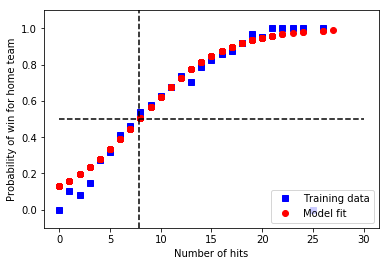

In [16]:
# Plot and visualize input and estimated probabilities
plt.plot(hits_range, prob_est_train_data, 'bs', label="Training data")
plt.plot(train_num_hits, prob_est_model[:, 1], 'ro', label="Model fit")
plt.plot([0, 30], [0.5, 0.5], "k--")
plt.plot([7.89, 7.89], [-0.1, 1.1], "k--")
plt.ylim([-0.1, 1.1])
plt.legend(loc="lower right")
plt.xlabel("Number of hits")
plt.ylabel("Probability of win for home team")
plt.show()

In [17]:
# Evaluate model
log_file = "GL2016.TXT"
df = pd.read_table(log_file, sep=",", header=None)

# Rename columns for readability
df.rename(columns = {6: 'Home Team', 9: 'Runs Visitor', 10: 'Runs Home', 50: 'Hits Home'}, inplace=True)

# Add new columns to indicate whether home team or visiting team won the game
df['Home Win'] = (df['Runs Home'] > df['Runs Visitor'])

# Construct test data
test_num_hits = df['Hits Home'].values.reshape([-1, 1])
test_win_label = df['Home Win'].values.reshape([-1, 1])

In [18]:
# Prediction
predict_win_label = logistic_reg.predict(test_num_hits)

In [19]:
# Get score
logistic_reg_score_test = logistic_reg.score(test_num_hits, test_win_label.ravel())
print("Percentage correct on test set = ", 100. * logistic_reg_score_test, "%")

Percentage correct on test set =  66.76276771004942 %


In [20]:
# Evaluate performance for each value of X
delta = np.abs(test_win_label.ravel() - predict_win_label.ravel())
hits_range = np.arange(np.min(test_num_hits), np.max(test_num_hits))
frac_correct = np.zeros([len(hits_range), 1])
for hits in hits_range:
    index_all = np.where(test_num_hits == hits)
    index_correct = np.where((test_num_hits.ravel() == hits) & (delta.ravel() == 0))
    frac_correct[int(hits - np.min(test_num_hits))] = len(index_correct[0]) / len(index_all[0])

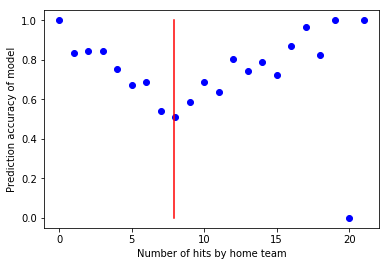

In [21]:
# Plot
plt.plot(hits_range, frac_correct,'bo')
plt.xlabel("Number of hits by home team")
plt.ylabel("Prediction accuracy of model")
mid_point = -1. * float(logistic_reg.intercept_) / float(logistic_reg.coef_) 
plt.plot([mid_point, mid_point], [0, 1], 'r')
plt.show()

Tutorial: https://learning.oreilly.com/oriole/analyzing-baseball-statistics-with-python-part-1